<a href="https://colab.research.google.com/github/msskx/deepLearning/blob/main/softmax%E5%A4%9A%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [12]:
data=pd.read_csv('/content/drive/MyDrive/torch学习笔记/iris.csv')

In [84]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [57]:
Y=np.array(pd.factorize(data.Species)[0])

In [58]:
X=np.array(data.iloc[:,1:5])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train_x,test_x,train_y,test_y=train_test_split(X ,Y,shuffle=True,test_size=0.3)

In [61]:
train_x=torch.from_numpy(train_x).type(torch.float32)
train_y=torch.from_numpy(train_y).type(torch.LongTensor)
test_x=torch.from_numpy(test_x).type(torch.float32)
test_y=torch.from_numpy(test_y).type(torch.LongTensor)

In [62]:
from torch.utils.data import TensorDataset,DataLoader

In [63]:
from sklearn.utils import shuffle
train_ds=TensorDataset(train_x,train_y)
train_dl=DataLoader(train_ds,batch_size=16)

test_ds=TensorDataset(test_x,test_y)
test_dl=DataLoader(test_ds,batch_size=16)

## 模型创建

In [64]:
from torch import nn
import torch.nn.functional as F

In [90]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.liner_1=nn.Linear(4,32)
    self.liner_2=nn.Linear(32,32)
    self.liner_3=nn.Linear(32,3)
  def forward(self,input):
    x=torch.relu(self.liner_1(input))
    x=torch.relu(self.liner_2(x))
    x=torch.sigmoid(self.liner_3(x))
    return x
    

In [91]:
def accuracy(y_pred,y_true):
  y_pred=torch.argmax(y_pred,dim=1)
  acc=(y_pred==y_true).float().mean()
  return acc

In [126]:
model=Model()

In [122]:
optim=torch.optim.Adam(model.parameters(),lr=0.001)

In [123]:
loss_fn=torch.nn.CrossEntropyLoss()

In [124]:
epochs=20

In [131]:
for epoch in range(epochs):
  for x,y in train_dl:
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
  with torch.no_grad():
    print(f'epoch:{epoch+1},train_loss:{round(loss_fn(model(train_x),train_y).item(),3)},train_acc:{round(accuracy(model(train_x),train_y).item(),3)}',end="+++")
    print(f'test_loss:{round(loss_fn(model(test_x),test_y).item(),3)},test_acc:{round(accuracy(model(test_x),test_y).item(),3)}')

epoch:1,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:2,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:3,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:4,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:5,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:6,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:7,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:8,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:9,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:10,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:11,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:12,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:13,train_loss:1.094,train_acc:0.333+++test_loss:1.094,test_acc:0.333
epoch:14,train_loss:1.094,train_ac

In [127]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl, epochs=20, device='cuda'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl : 
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    history = {} # Collects per-epoch loss and acc like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    history['acc'] = []
    history['val_acc'] = []

    start_time_sec = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        model.train()
        train_loss         = 0.0
        num_train_correct  = 0
        num_train_examples = 0

        for batch in train_dl:

            optimizer.zero_grad()

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            loss.backward()
            optimizer.step()

            train_loss         += loss.data.item() * x.size(0)
            num_train_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_train_examples += x.shape[0]

        train_acc   = num_train_correct / num_train_examples
        train_loss  = train_loss / len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        val_loss       = 0.0
        num_val_correct  = 0
        num_val_examples = 0

        for batch in val_dl:

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            val_loss         += loss.data.item() * x.size(0)
            num_val_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_val_examples += y.shape[0]

        val_acc  = num_val_correct / num_val_examples
        val_loss = val_loss / len(val_dl.dataset)


        print('Epoch %3d/%3d, train loss: %5.2f, train acc: %5.2f, val loss: %5.2f, val acc: %5.2f' % \
              (epoch+1, epochs, train_loss, train_acc, val_loss, val_acc))

        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # END OF TRAINING LOOP
    end_time_sec       = time.time()
    total_time_sec     = end_time_sec - start_time_sec
    time_per_epoch_sec = total_time_sec / epochs
    print()
    # print('Time total:     %5.2f sec' % (total_time_sec))
    # print('Time per epoch: %5.2f sec' % (time_per_epoch_sec))

    plt.figure(dpi=400)
    plt.plot(range(1,epochs+1),history['loss'],label='train_loss')
    plt.plot(range(1,epochs+1),history['val_loss'],label='test_loss')
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(dpi=400)
    plt.plot(range(1,epochs+1),history['acc'],label='train_acc')
    plt.plot(range(1,epochs+1),history['val_acc'],label='test_acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    return history

train() called: model=Model, opt=Adam(lr=0.001000), epochs=20, device=cpu

Epoch   1/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   2/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   3/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   4/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   5/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   6/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   7/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   8/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch   9/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch  10/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
Epoch  11/ 20, train loss:  1.09, train acc:  0.33, val loss:  1.09, val acc:  0.33
E

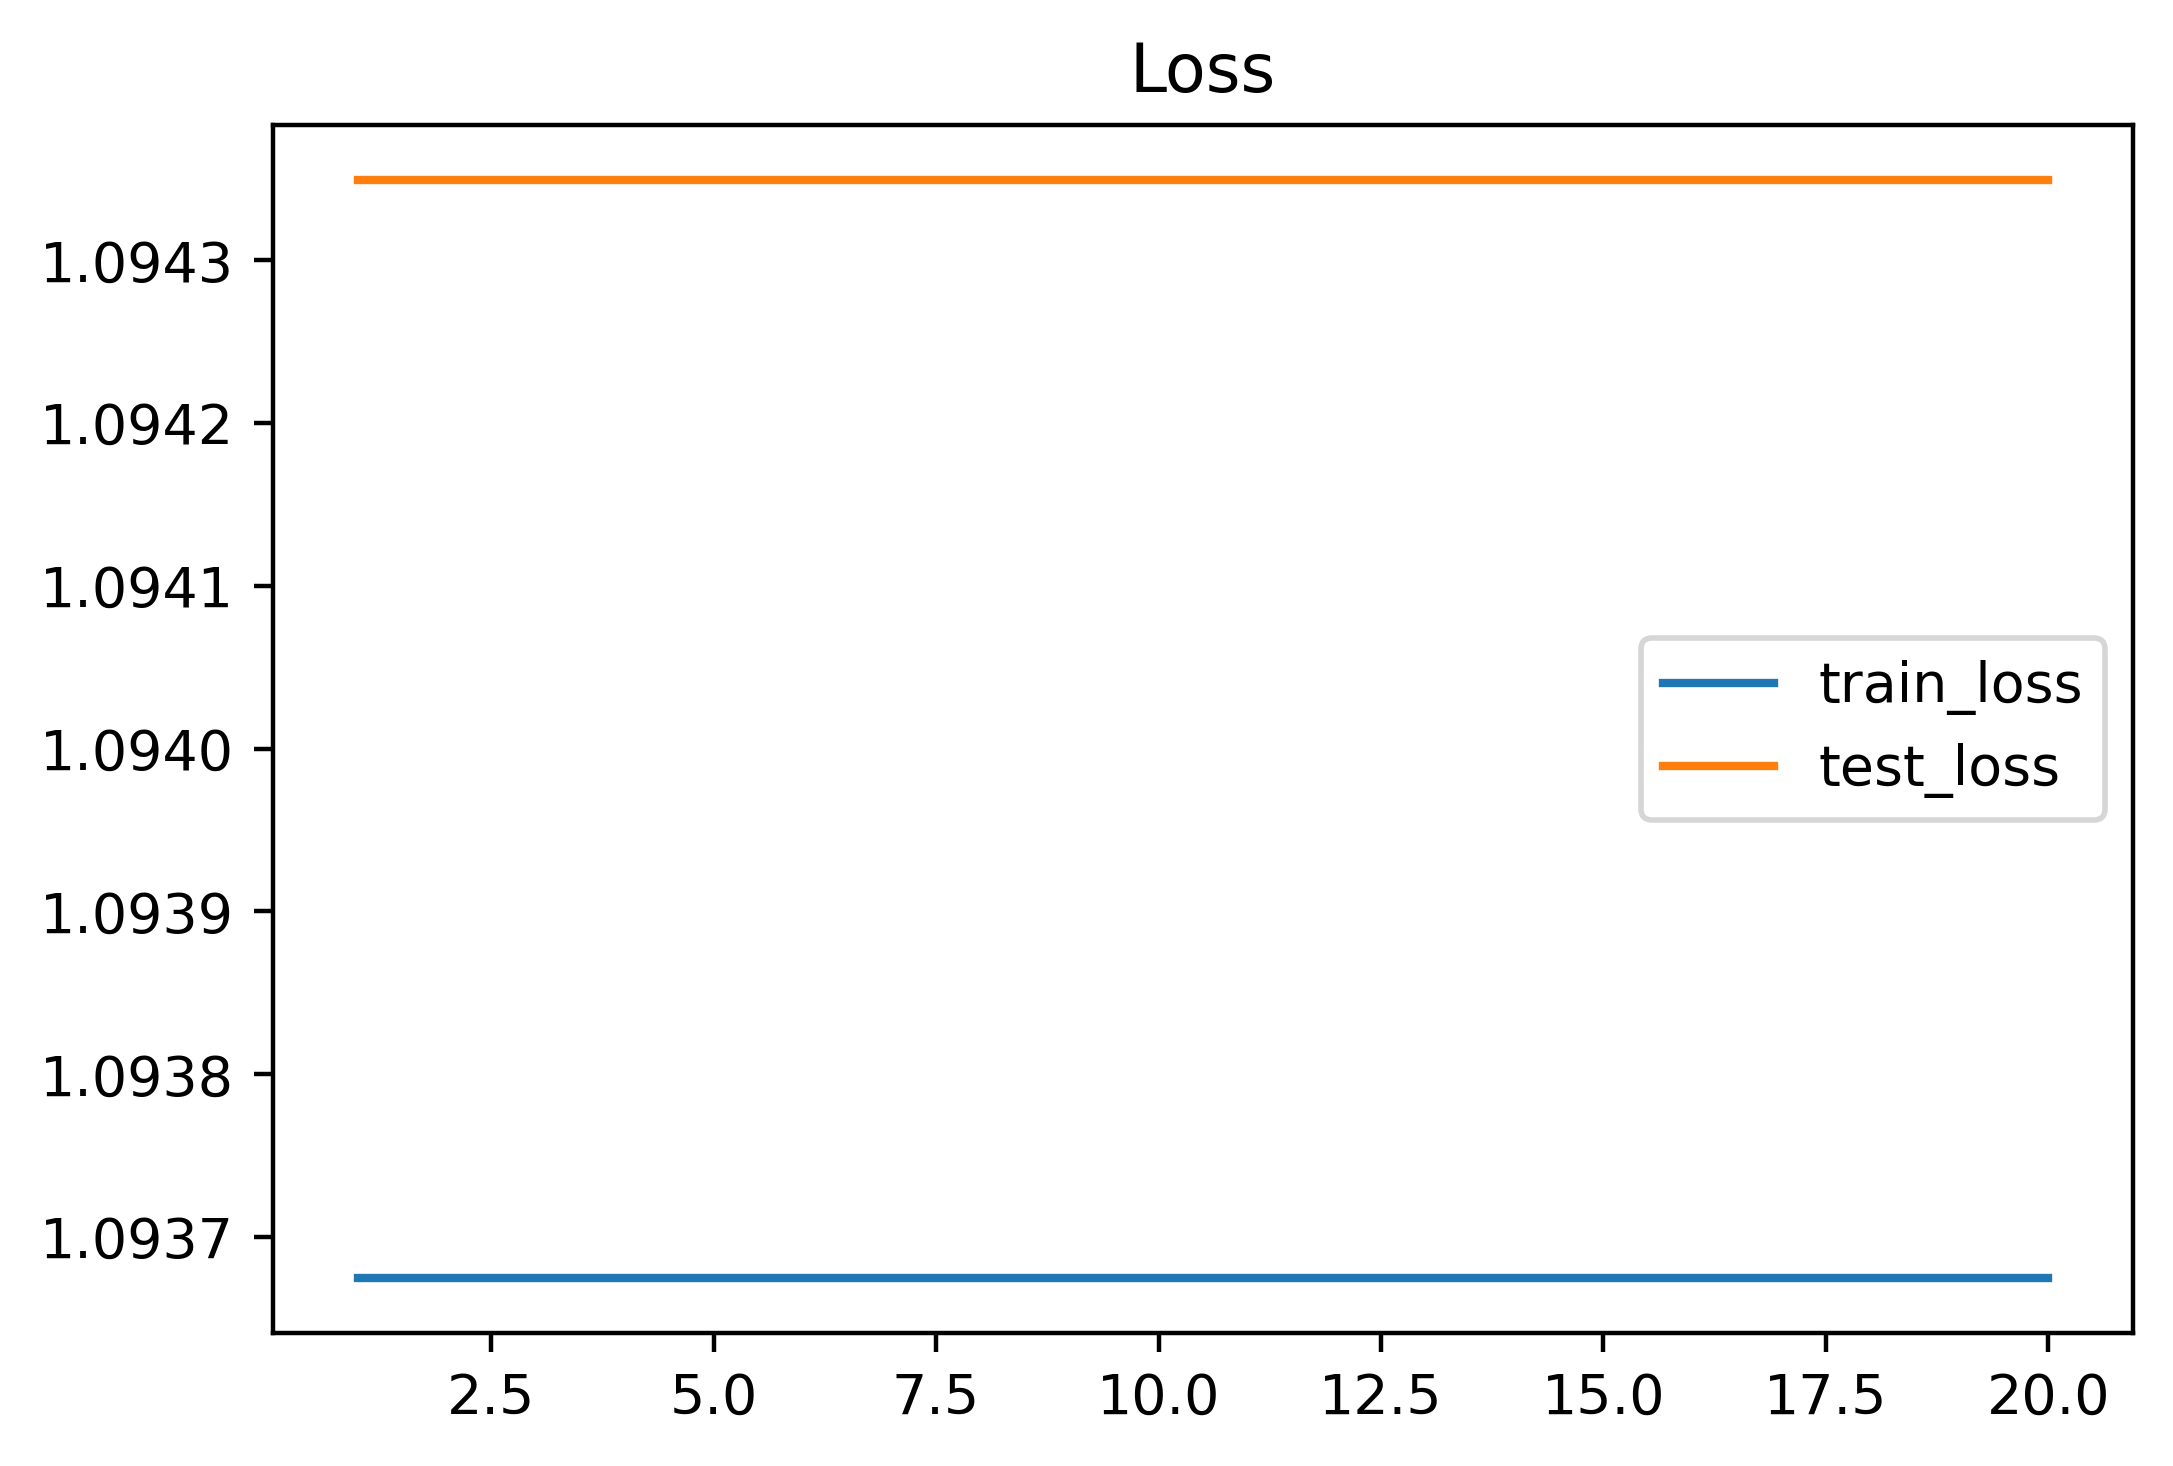

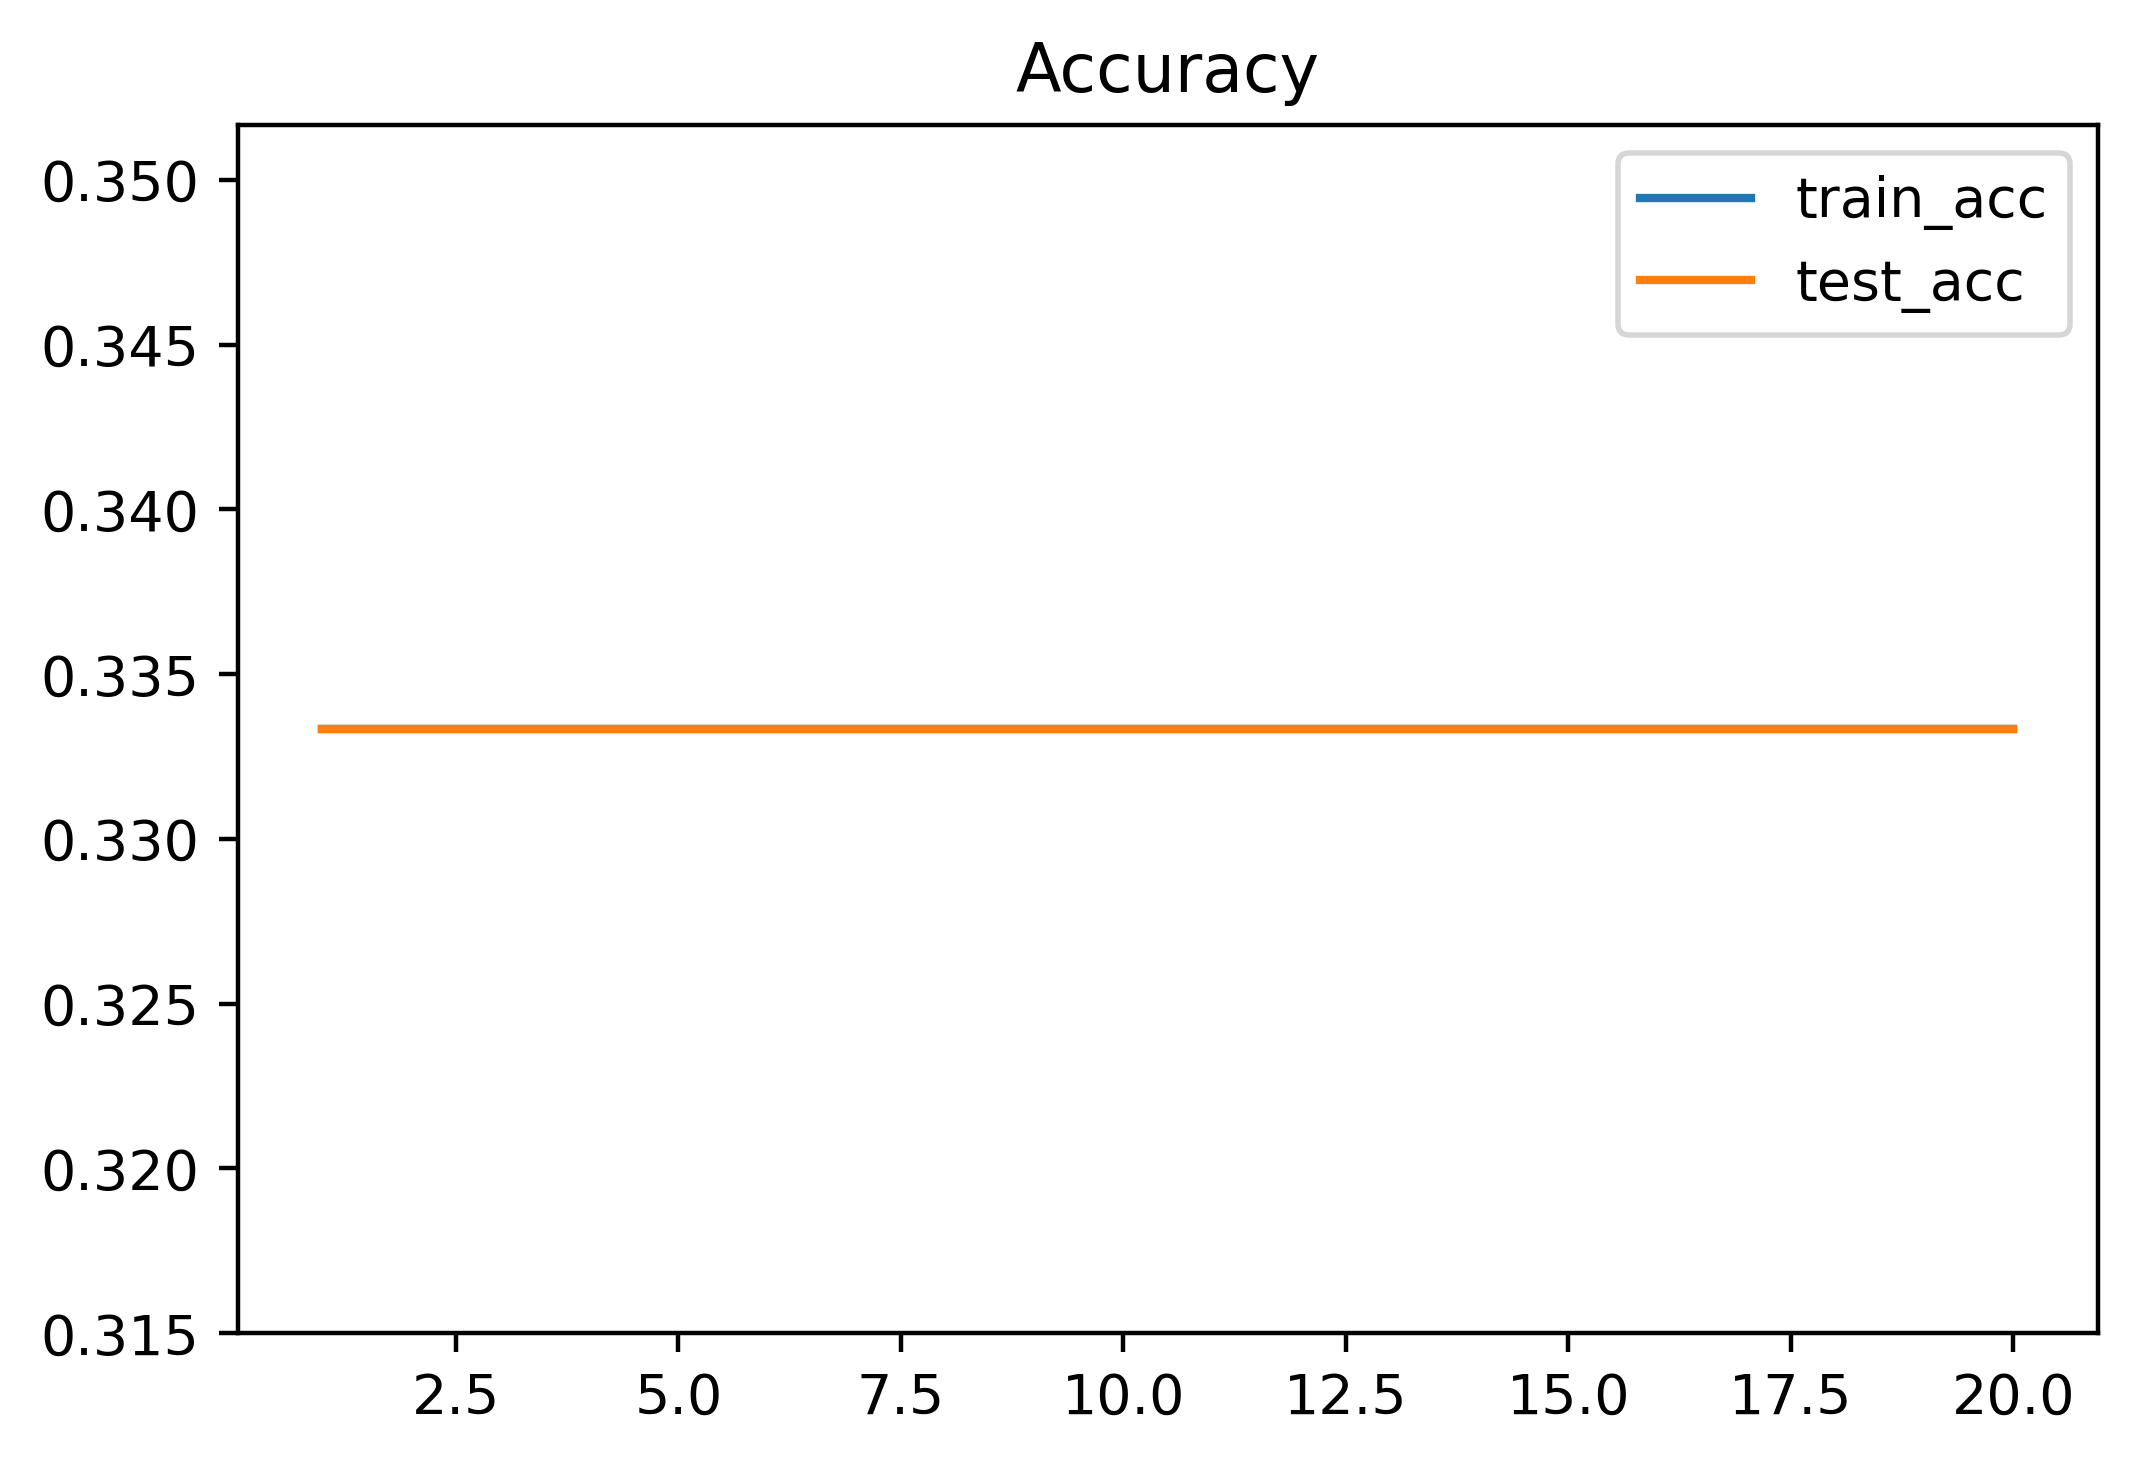

In [128]:
history=train(model, optim, loss_fn, train_dl, test_dl, epochs=20, device='cpu')

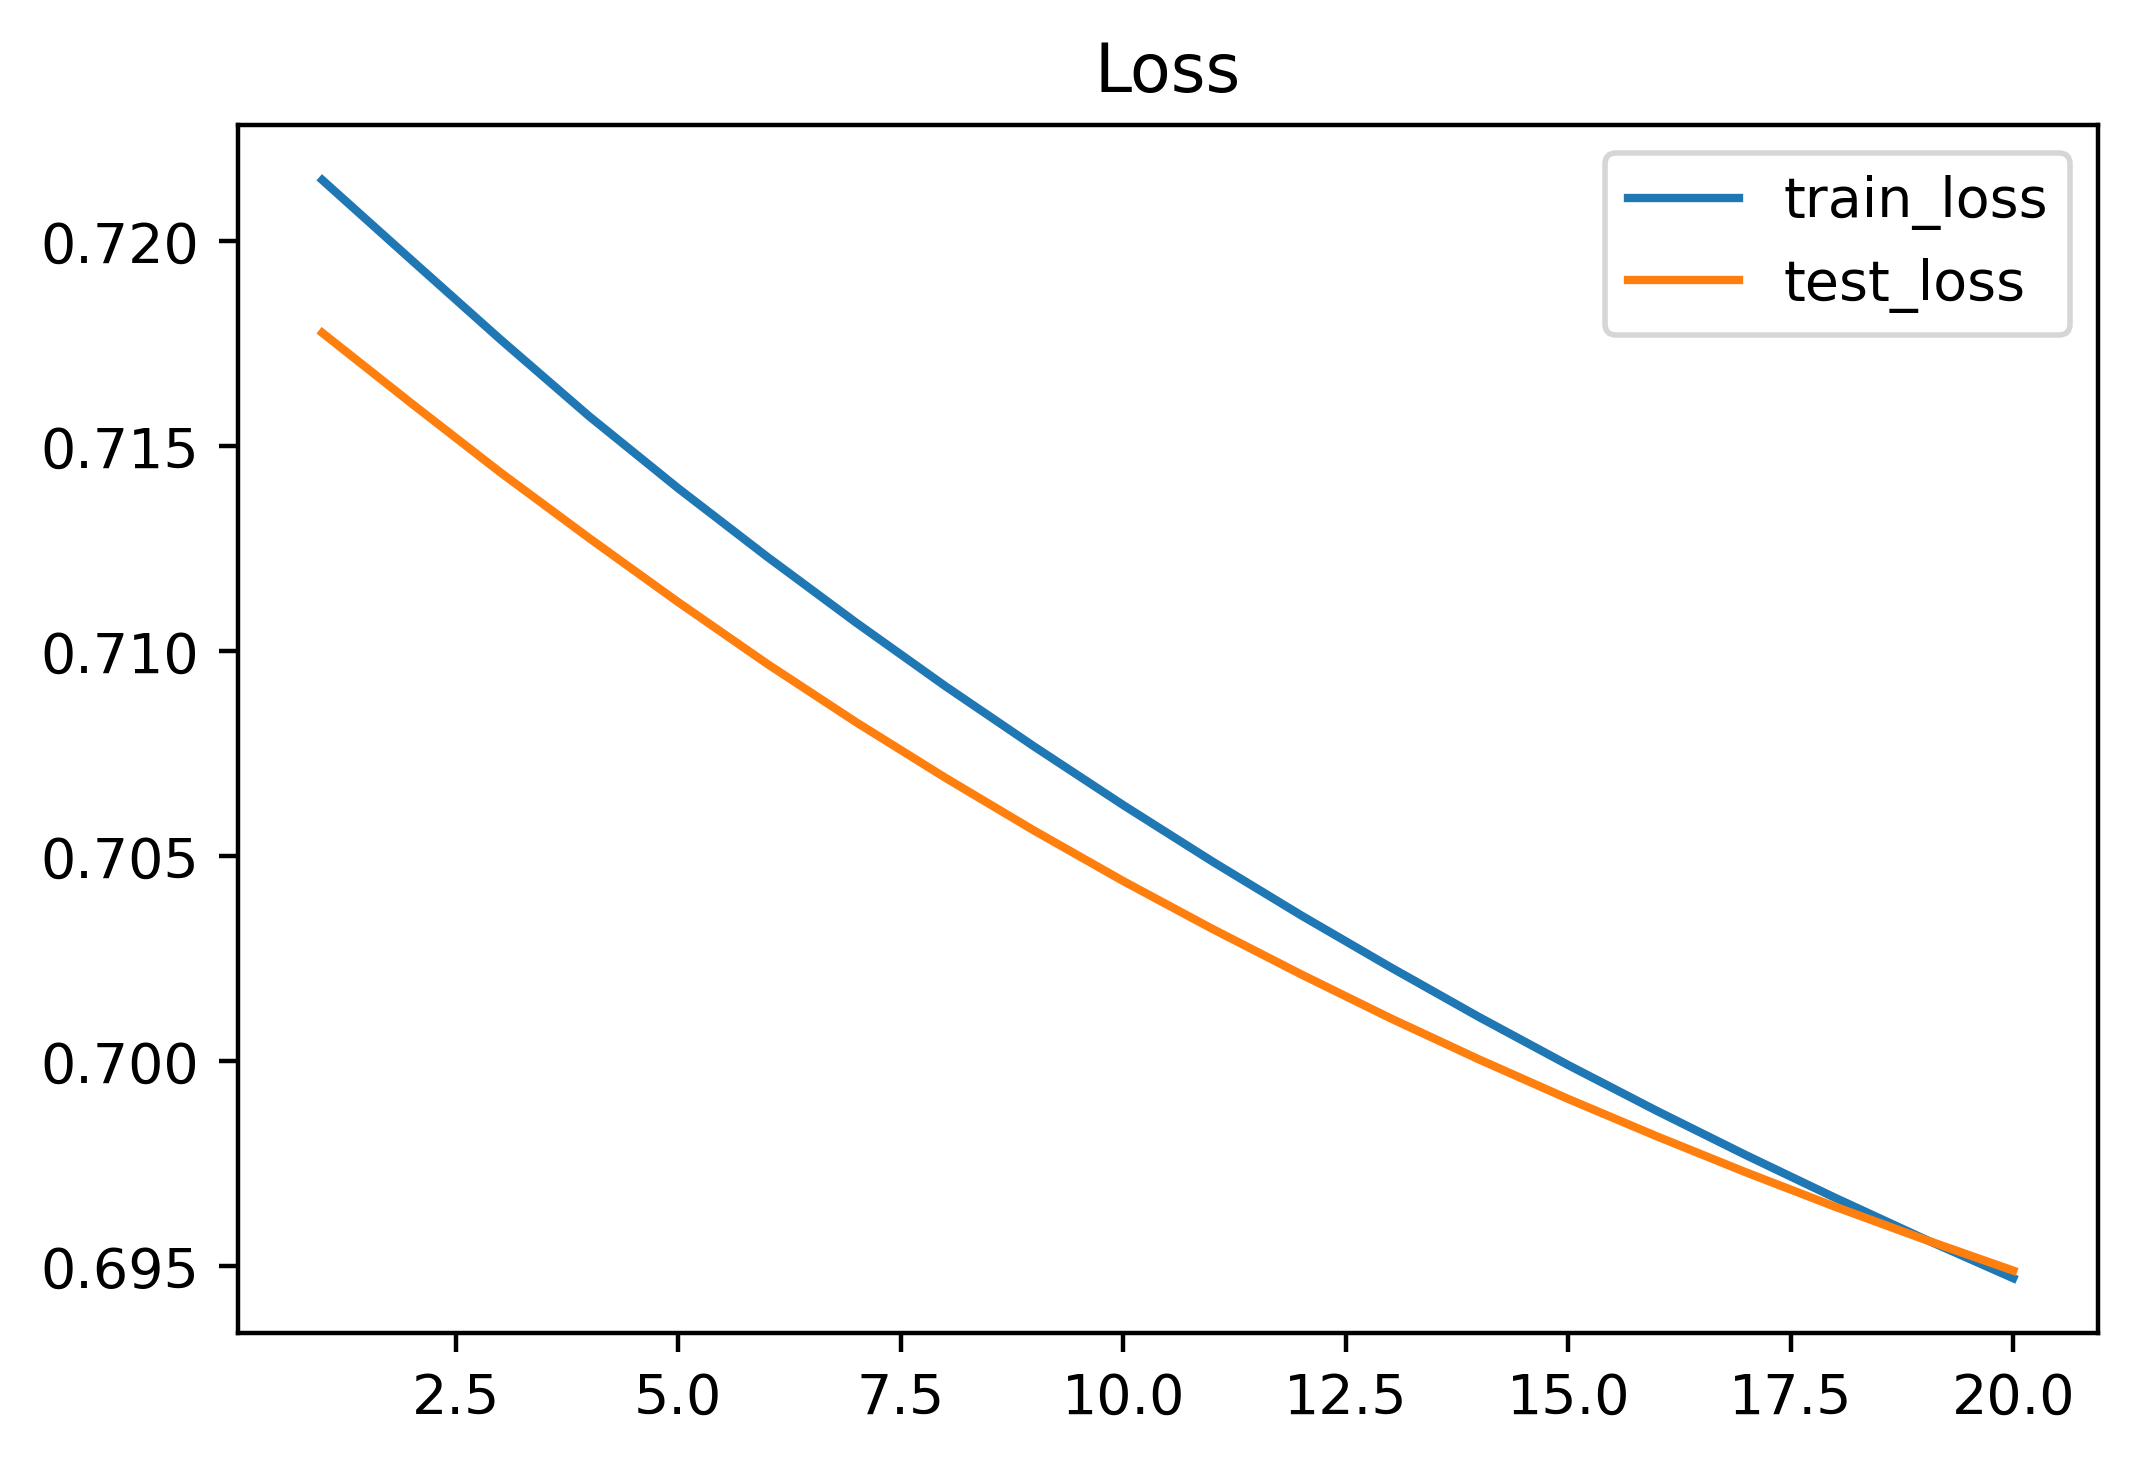

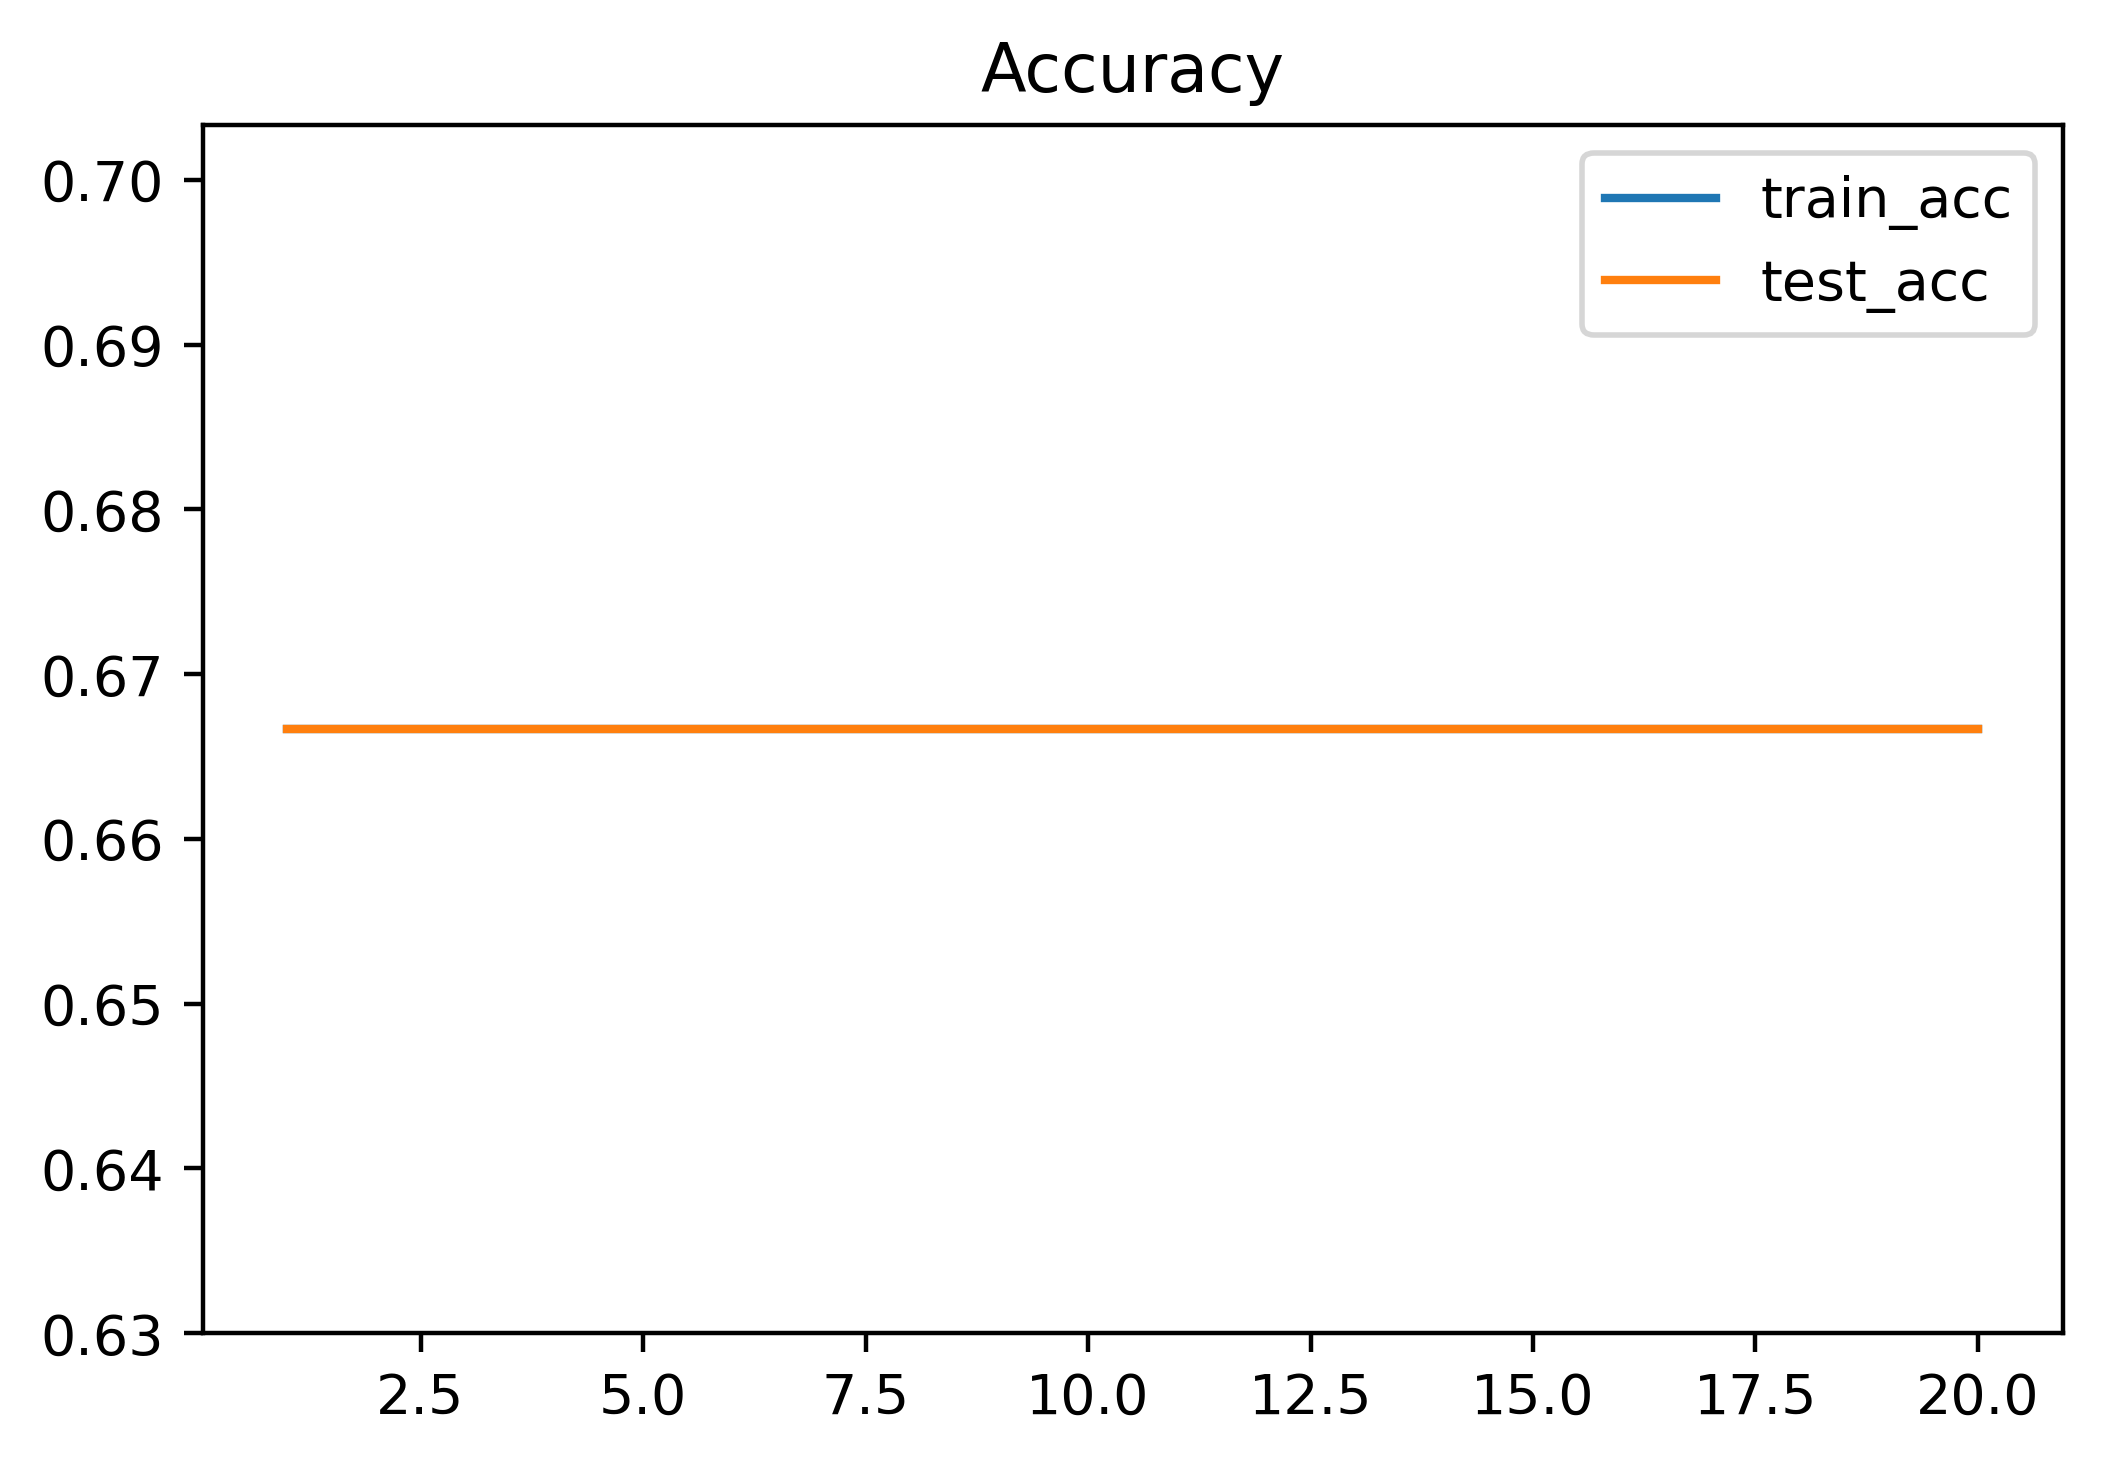